In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [3]:
df_da = df[df['job_title_short'] == 'Data Analyst'].copy(deep=True)

In [4]:
df_da["job_posted_month_no"] = df_da["job_posted_date"].dt.month

In [6]:
df_da_exploded = df_da.explode('job_skills')

In [9]:
df_da_pivot=df_da_exploded.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

In [13]:
df_da_pivot.loc["Total"] = df_da_pivot.sum(numeric_only=True)

In [21]:
top_10 = df_da_pivot.loc["Total"].sort_values(ascending=False).head(10).index.to_list()

In [ ]:
df_da_plot = df_da_pivot[df_da_pivot.index != 'Total'][top_10]

In [35]:
df_da_plot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap
job_posted_month,,,,,,,,,,
Jan,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251
Feb,7947,5772,4751,3936,3307,2576,2634,1291,1235,954
Mar,7868,5675,4741,4051,3176,2650,2554,1266,1203,892
Apr,7553,5496,4557,3776,3106,2399,2598,1190,1177,947
May,6617,4773,4070,3245,2695,2093,1940,979,957,851
Jun,7584,5724,4707,3812,3275,2442,2174,1173,1237,987
Jul,7687,5513,4831,3928,3350,2444,2118,1096,1069,996
Aug,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117
Sep,6829,4886,4229,3446,3118,2146,1880,944,945,852


In [34]:
df_da_plot = df_da_plot.reset_index()
df_da_plot['job_posted_month'] = df_da_plot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_da_plot = df_da_plot.set_index('job_posted_month')
df_da_plot = df_da_plot.drop(columns='job_posted_month_no')

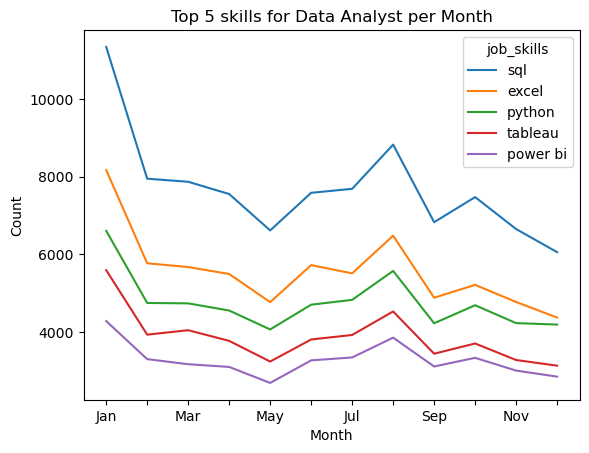

In [36]:
df_da_plot.iloc[:,:5].plot(kind='line')
plt.title("Top 5 skills for Data Analyst per Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.gca().set_xticks(list(range(0, 12)))
plt.show()